# Big Mart Sales Analysis by Simran Goyal

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [33]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [34]:
# Importing the required libraries:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

### Importing the dataset and displaying it

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/simrang02/big_mart_sales_analysis_eda/master/Big_mart.csv')
pd.options.display.max_columns = None
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Defining the shape of the dataset

In [36]:
df.shape

(8523, 12)

### Defining the size of the dataset

In [37]:
df.size

102276

### Describing the dataset

In [38]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Checking for null values in the dataset

In [39]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling the null values in Item_Weight

We are handling the null values by placing the mean values in the column.

In [40]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)
df.Item_Weight.head(20)

0      9.300000
1      5.920000
2     17.500000
3     19.200000
4      8.930000
5     10.395000
6     13.650000
7     12.857645
8     16.200000
9     19.200000
10    11.800000
11    18.500000
12    15.100000
13    17.600000
14    16.350000
15     9.000000
16    11.800000
17     9.000000
18    12.857645
19    13.350000
Name: Item_Weight, dtype: float64

### Handling the null values in Outlet_Size

We are handling the null values by filling the word 'Missing' in the column.

In [41]:
df.Outlet_Size.fillna('Missing',inplace=True)
df.Outlet_Size.head(20)

0      Medium
1      Medium
2      Medium
3     Missing
4        High
5      Medium
6        High
7      Medium
8     Missing
9     Missing
10     Medium
11      Small
12     Medium
13      Small
14       High
15      Small
16     Medium
17     Medium
18     Medium
19      Small
Name: Outlet_Size, dtype: object

### Handling the mis-coded values in Item_Fat_Content

We are handling the mis-coded values by replacing them by the actual value.

In [42]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].head(20)

0     Low Fat
1     Regular
2     Low Fat
3     Regular
4     Low Fat
5     Regular
6     Regular
7     Low Fat
8     Regular
9     Regular
10    Low Fat
11    Regular
12    Regular
13    Regular
14    Low Fat
15    Regular
16    Low Fat
17    Regular
18    Low Fat
19    Low Fat
Name: Item_Fat_Content, dtype: object

# Exploratory Data Analysis

The aim of this report is to predict the item outlet sales based on various parameters. Our main objective here is to define a report consisting of Data Visualisation using various libraries like Seaborn and Matplotlib. Here, we will visualise and predict the item outlet sales using the test data.

The parameters used in this data set are very general and relatable. The various parameters considered in this data set are- the item weight, the fat content, the type of item, MRP of item etc.

## Data Description

The data used here is in csv format. A CSV (Comma-Separated Values) file stores data in a tabular format consisting of rows and columns. The data in every row is separated by commas. It looks like a database or a spreadsheet.

This data is produced by the scientists at BigMart in 2013. The data set used here will be helpful for us to predict the item outlet sales based on the different parameters like- what is the item weight, what is the MRP of the item, what is the type of item, what is the outlet size etc. This is a general data set, that is observed and collected on various different parameters. All the parameters are continuous in nature.

## Attribute Information
The various attributes on which the data is observed are:

1. Item Weight- Weight of product
2. Fat Content in the Item- Whether the product is low fat or not
3. Item Visibility- The % of totla display area of all products in a store allocated to the particular product
4. Item Type- The category to which the product belongs
5. Item MRP- Maximum Retail Price (list price) of the product
6. Outlet Establishment Year - The year in which the store was established
7. Outlet Size- The sie of the store in terms of ground area covered
8. Outlet Location Type- The type of city in which the store is located
9. Outlet Type- Whether the outlet is just a grocery store or some sort of supermarket
10. Item Outlet Sales- Sales of the product in the particular store. This is the outcome variable to be predicted

![title](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQR5yvLWYYez0dkG3T3eapgTbN22UTBvVC7YDw3McBSmDdWkLcA8Q)

## Univariate Analysis

'Uni' stands for One. This means that the analysis is done considering one variable. This is the simplest method of analysis. Univariate analysis is used to describe the data and observe the pattern. Hence, it is also helpful during the bivariate or multivariate analysis.

### Item Weight- Histogram

Here is the histogram for the item weight of the houses:

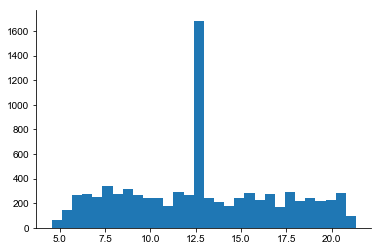

In [43]:
plt.hist(x  = 'Item_Weight',  data=df, bins=30)
sns.set(rc={'figure.figsize':(21.0,8.27)})
sns.despine()

From the above histogram, we can observe:

1. The above data is continuous in nature.
2. There are many outliers present in the above graph.
3. The products with weight from 12-13 kg are high in number.

### Item Fat Content- Count plot

Here is the count plot for the fat content in the item:

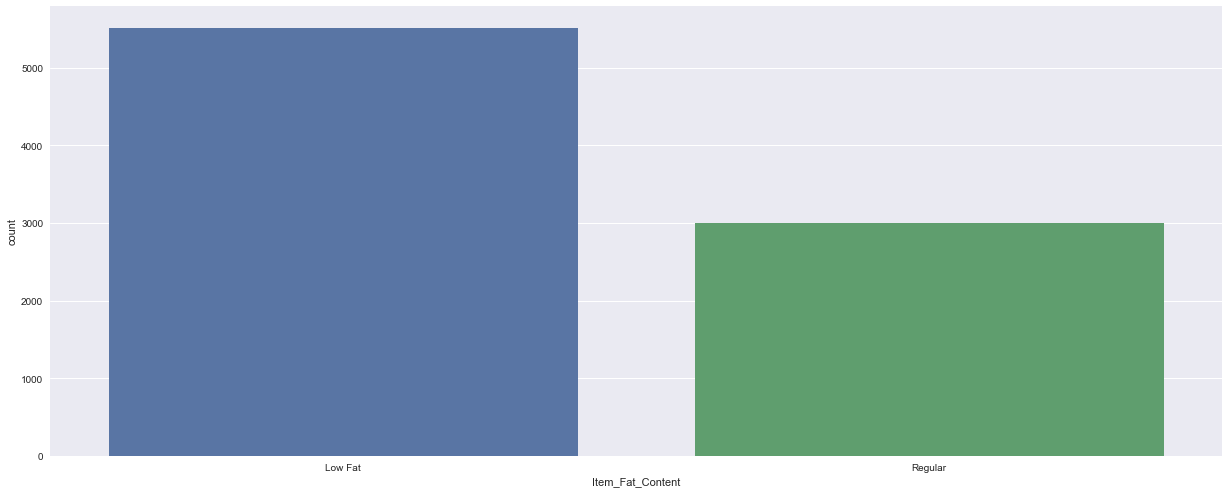

In [44]:
sns.countplot(x  = 'Item_Fat_Content',data=df)
sns.despine()

From the above count plot, we can observe:

1. There are only two types- the products having low fat or regular fat.
2. The products having low fat are very high in number.
3. The products having regular fat are around 3000.

### Item Visibility- Distribution plot

Here is the distribution plot for the visibility of the item:

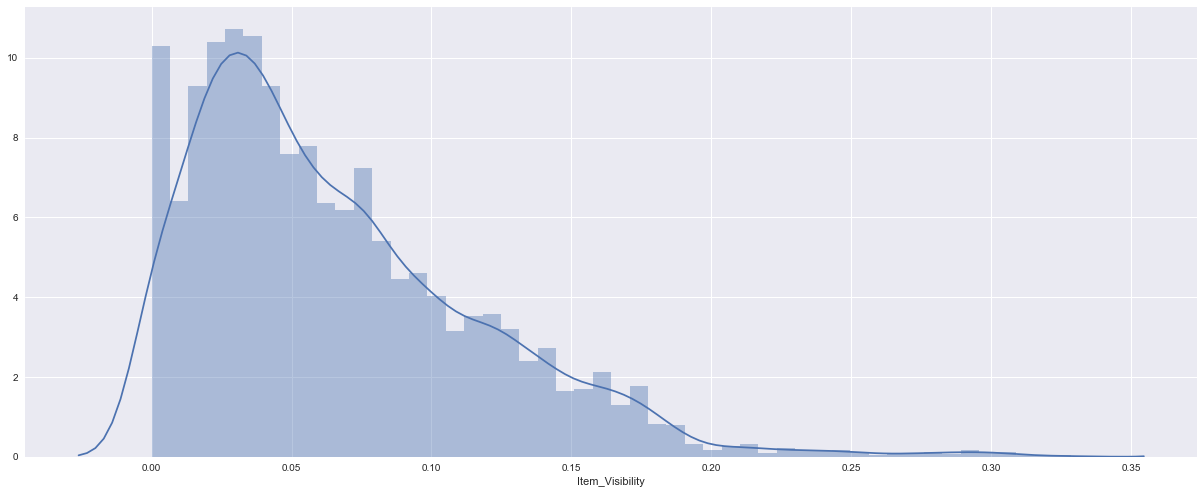

In [45]:
sns.distplot(df['Item_Visibility'])
sns.despine()

From the above distribution plot, we can observe:

1. The above data is continuous in nature.
2. There are many outliers present in the above graph.
3. The above plot is skewed.
3. The product visibility is upto 20% mostly.

### Item Type- Count plot
Here is the count plot for the type of the item:

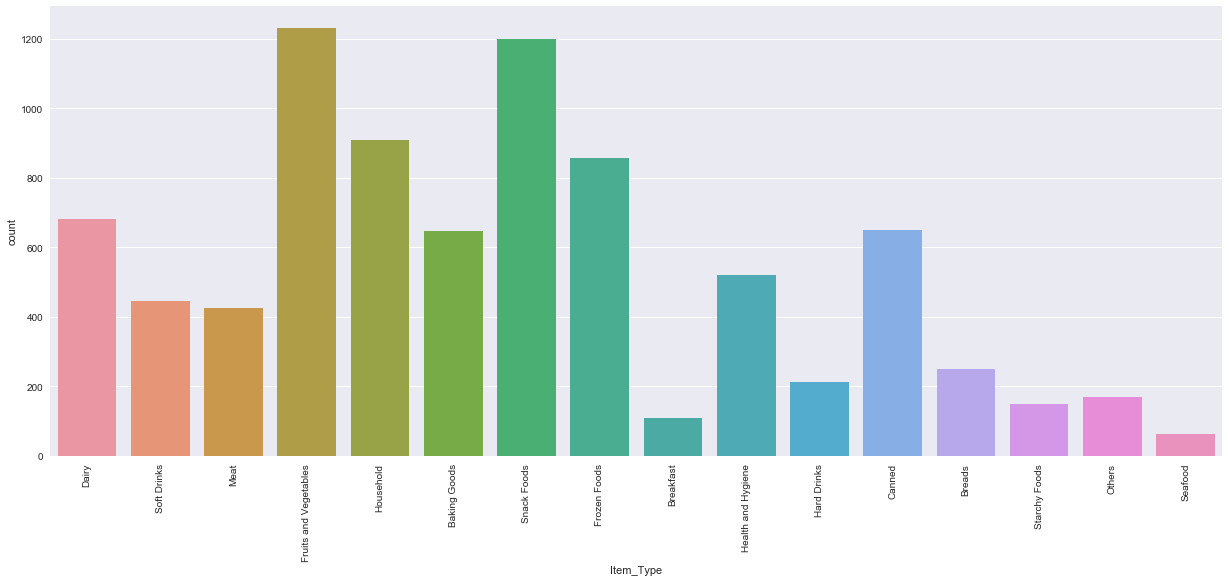

In [46]:
sns.countplot(x  = 'Item_Type',data=df)
N=16
ind=np.arange(N)
s=(df['Item_Type'].unique())
plt.xticks(ind,s,rotation='vertical')
plt.show()

From the above count plot, we can observe:

1. The item type is distributed in 16 sections like dairy, soft drinks, meat etc.
2. The items related to fruits and vegetables and snack foods are high in number.
3. The items related to breakfast, seafood,starchy foods and others are less in number.

### Item MRP- Distribution plot
Here is the distribution plot for MRP of the item:

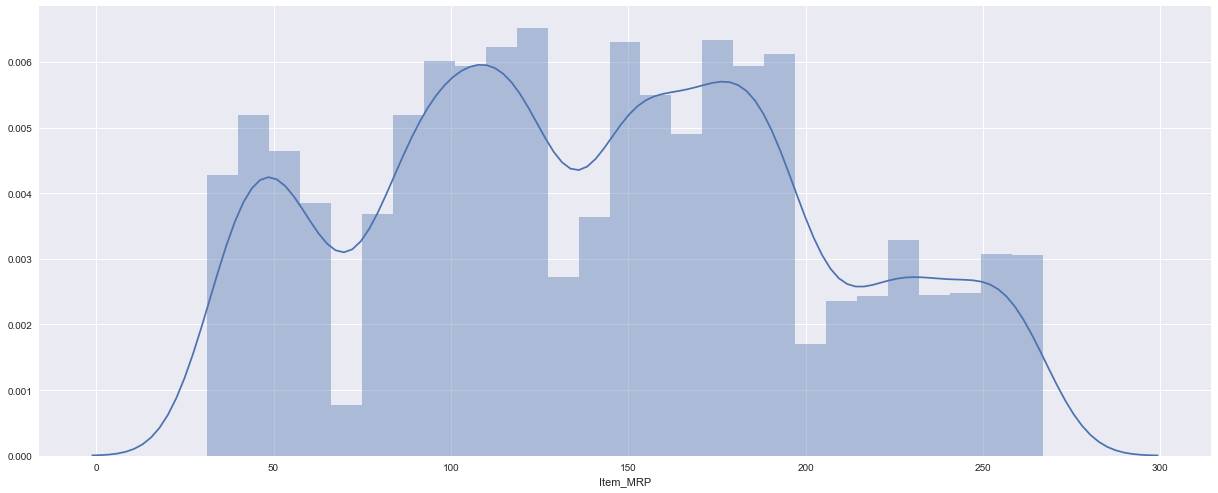

In [47]:
sns.distplot(df['Item_MRP'])
sns.despine()

From the above distribution plot, we can observe:

1. The above data is continuous in nature.
2. The products having price between 80-200 are high in number.
3. The products having price greater than 200 are less in number.

### Item Outlet Sales- Distribution plot

Here is the distribution plot for the item outlet sales:

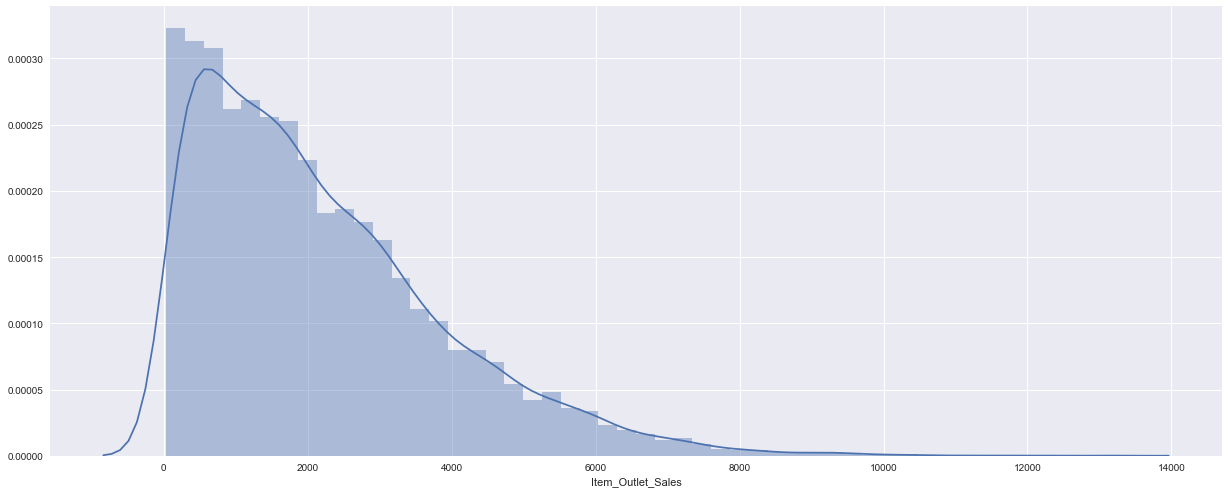

In [48]:
sns.distplot(df['Item_Outlet_Sales'])
sns.despine()

From the above distribution plot, we can observe:

1. The above data is continuous in nature.
2. There are many outliers present in the above graph.
3. The above plot is skewed.
4. The products having sale between 0-2000 are high.

## Bivariate Analysis

'Bi' stands for Twp. This means that the analysis is done considering two variables. It is the simultaneous analysis of two variables. It tells us about the dependencies, association and relation between these two specific variables. After analysing their relation, we can infer the level of their dependencies on each other.

We will now analyse the co-relation between all the considered parameters.

In [49]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


We use heatmap to plot the relation between the various parameters. The positive values show direct relation whereas the negative values represent opposite or indirect relation.

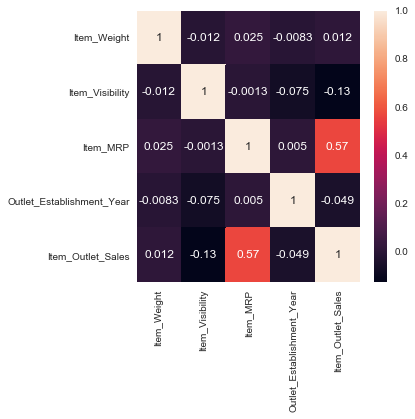

In [50]:
plt.figure(figsize  =(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Item MRP vs Item Outlet Sales- Regression Plot

Here is the regression plot for Item MRP vs Item Outlet Sales:

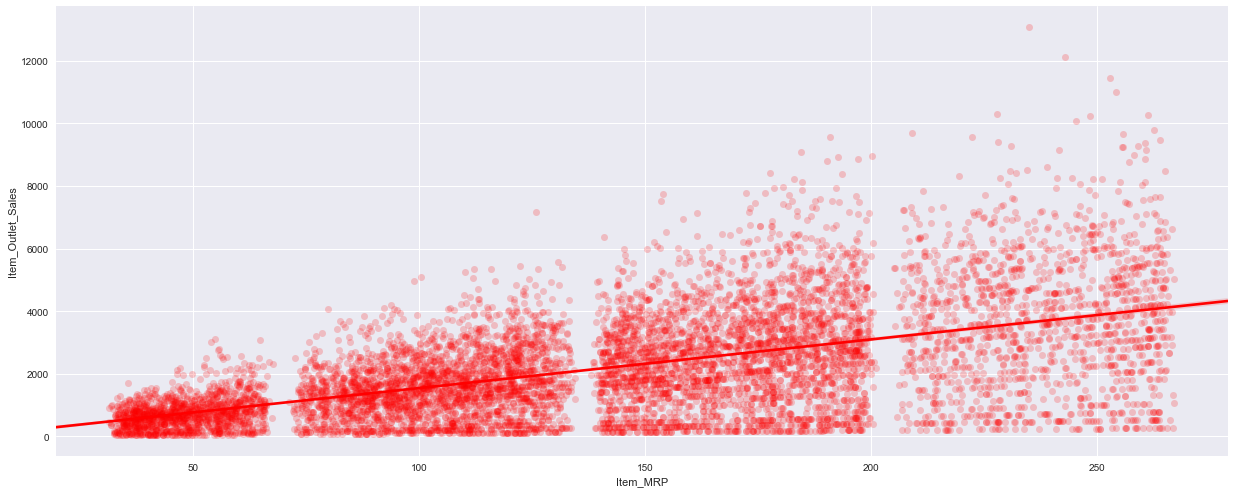

In [51]:
sns.regplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2},color='red')
sns.despine()

From the above regression plot, we infer:


1. The houses having less MRP has less outlet sales.
2. The above distibution shows that as the item MRP increases the outlet sales also increases.
3. This shows that there exists a direct relation between the item MRP and the Outlet Sales.

### Item Visibility vs Item Outlet Sales- Regression Plot

Here is the regression plot for Item Visibility vs Item Outlet Sales:

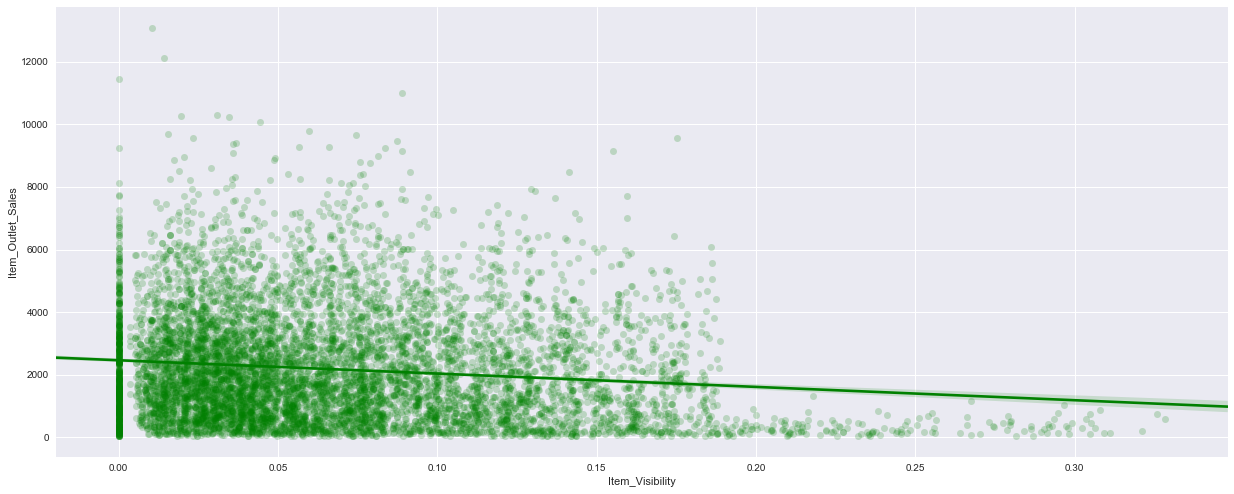

In [52]:
df['Item_Visibility1'] = df['Item_Visibility']*1000;
sns.regplot(x = 'Item_Visibility',y = 'Item_Outlet_Sales',data = df , scatter_kws={'alpha':0.2},color='green')
sns.despine()
a = df.drop('Item_Visibility1',axis=1,inplace=True)

From the above regression plot, we infer:

1. The items having visibility less than 0.15 has high item outlet sales as compared to the items having high visibility.
2. The above distibution shows that as the item visibility increases, the outlet sales decreases.
3. This shows that there exists an indirect relation between the item visibility and the item outlet sales.

### Item Weight vs Item Outlet Sales- Regression Plot

Here is the regression plot for Item Weight vs Item Outlet Sales:

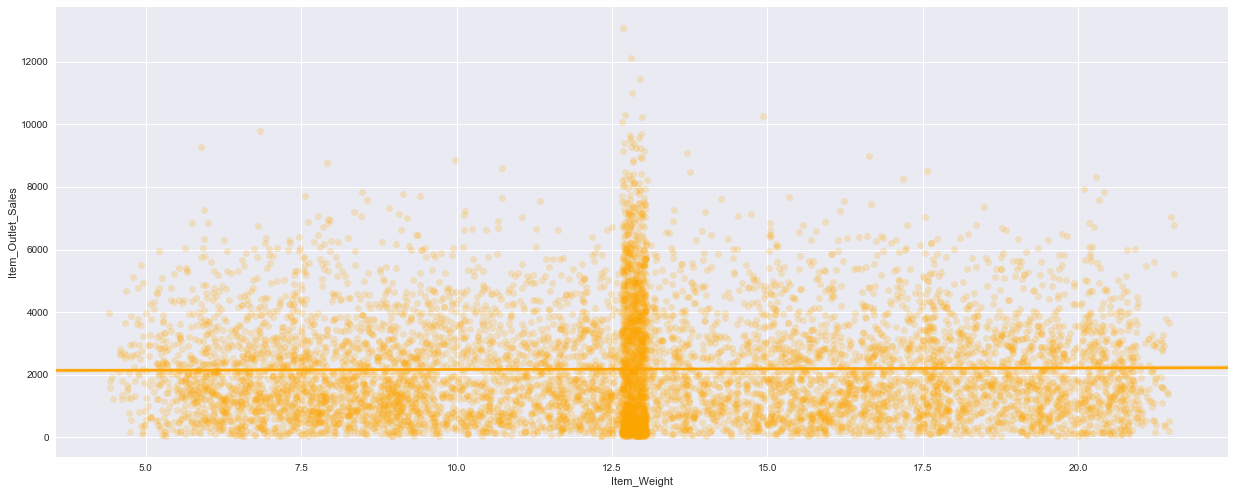

In [53]:
sns.regplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2},color='orange')
sns.despine()

From the above regression plot, we infer:

1. The products having weight between 12.5-13.5 kg have high outlet sales.
2. The above distibution shows that there is no relation between the outlet sales and weight as such.

## Multivariate Analysis

'Multi' stands for Many. This means that the analysis is done considering more than two variables. It is the simultaneous analysis of many variables. It tells us about the dependencies, association and relation between the variables. After analysing their relation, we can infer the level of their dependencies on each other.


Our main aim of this analysis is to predict the item outlet sales. Hence, we will analyse parameters with respect to item outlet sales here.

### Item MRP vs Item Outlet Sales in terms of Outlet Establishment Year- Facet grid

Here is the facet grid for Item MRP vs Item Outlet Sales in terms of Outlet Establishment Year:

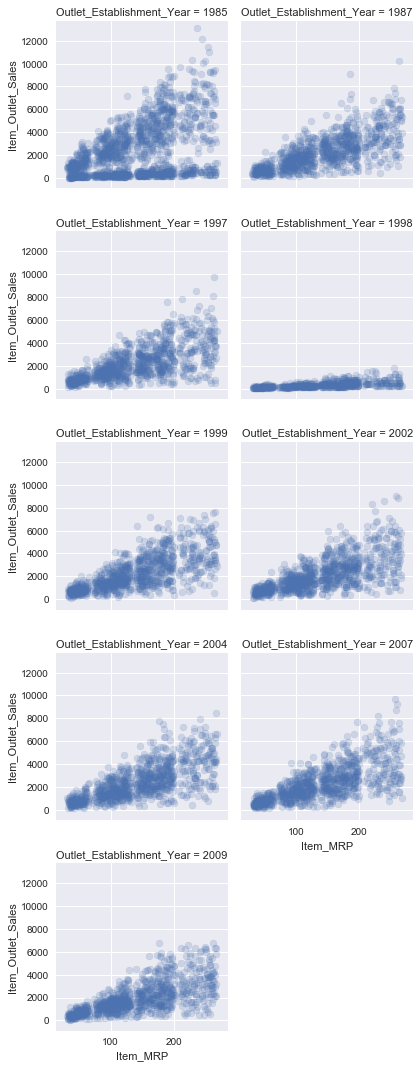

In [54]:
grid = sns.FacetGrid(df, col='Outlet_Establishment_Year',col_wrap=2)
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales',alpha = 0.2)
sns.despine()

From the above graphs, we infer:

1. High the MRP of the product, higher the outlet sales of the product.
2. Year 1998, have less outlet sales irrespective of the MRP of the product.

## Feature Engineering

Feature engineering means building additional features out of existing data which is often spread across multiple related tables. Feature engineering requires extracting the relevant information from the data and getting it into a single table which can then be used to train a machine learning model.

We perform feature engineering on the various parameters to change the string format to integer using get dummies and 0-1 encoding.

In [55]:
New_Item_Fat_Content = [1 if values == 'Regular' else 0 for values in df.Item_Fat_Content ]
df['Item_Fat_Content'] = New_Item_Fat_Content

In [56]:
pd.options.display.max_columns = None
df1 = pd.get_dummies(df, columns=['Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
df1.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300000,0,0.016047,249.8092,OUT049,1999,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,DRC01,5.920000,1,0.019278,48.2692,OUT018,2009,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,FDN15,17.500000,0,0.016760,141.6180,OUT049,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,FDX07,19.200000,1,0.000000,182.0950,OUT010,1998,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.930000,0,0.000000,53.8614,OUT013,1987,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
5,FDP36,10.395000,1,0.000000,51.4008,OUT018,2009,556.6088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
6,FDO10,13.650000,1,0.012741,57.6588,OUT013,1987,343.5528,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
7,FDP10,12.857645,0,0.127470,107.7622,OUT027,1985,4022.7636,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
8,FDH17,16.200000,1,0.016687,96.9726,OUT045,2002,1076.5986,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
9,FDU28,19.200000,1,0.094450,187.8214,OUT017,2007,4710.5350,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


### Finding P-Values for every column

A p-value is the probability of rejecting a null-hypothesis when the hypothesis is proven true. The null hypothesis is a statement that says that there is no difference between two measures. If the p-value is equal to or less than the significance level (α), then the null hypothesis is inconsistent and it needs to be rejected.

In [57]:
import itertools
from scipy.stats import pearsonr
correlations = {}
df2 = df1.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
columns = df2.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + ' --- ' + col_b] = pearsonr(df2.loc[:, col_a], df2.loc[:, col_b])

result = df2.from_dict(correlations, orient='index')
result.columns = ['PCC', 'P-Value']
pd.options.display.max_rows = None
print(result.sort_index().head(20))

                                                         PCC        P-Value
Item_Fat_Content --- Item_MRP                       0.006063   5.757179e-01
Item_Fat_Content --- Item_Outlet_Sales              0.018719   8.398917e-02
Item_Fat_Content --- Item_Type_Baking Goods         0.083804   9.237800e-15
Item_Fat_Content --- Item_Type_Breads               0.032643   2.578733e-03
Item_Fat_Content --- Item_Type_Breakfast            0.065711   1.262525e-09
Item_Fat_Content --- Item_Type_Canned               0.073235   1.295649e-11
Item_Fat_Content --- Item_Type_Dairy                0.021236   4.994933e-02
Item_Fat_Content --- Item_Type_Frozen Foods         0.085041   3.718674e-15
Item_Fat_Content --- Item_Type_Fruits and Veget...  0.116955   2.405031e-27
Item_Fat_Content --- Item_Type_Hard Drinks         -0.118461   5.131400e-28
Item_Fat_Content --- Item_Type_Health and Hygiene  -0.188156   9.269944e-69
Item_Fat_Content --- Item_Type_Household           -0.255203  8.269556e-127
Item_Fat_Con

In [58]:
# importing the required libraries for regression
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.tree import *
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import *
from sklearn.metrics import *

Defining the data and the target for building a regression model.

In [59]:
title = df1['Item_Outlet_Sales']
train = df1.drop(['Item_Outlet_Sales', 'Item_Identifier','Outlet_Identifier'],axis=1)

Splitting the dataset into test and train variables with training size as 0.82 and testing size as 0.18.

In [60]:
x_train , x_test , y_train , y_test = train_test_split(train , title , train_size = 0.82,random_state =42)

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.

In [61]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
reg.score(x_test,y_test)

0.5823007458464053

### Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [63]:
clf = RandomForestRegressor(n_estimators=10,max_depth=6,random_state=42).fit(train,title)
results = model_selection.cross_val_score(clf, train, title)
results.mean()

0.5923577474959213

### Gradient Boosting Regressor

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [64]:
gbr = GradientBoostingRegressor(n_estimators=50)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
gbr.score(x_test,y_test)

0.6115859478868383

# Summary

From the above plots, we conclude that there are various parameters involved in determining the outlet sales. Like:

1. Less the visibility, more the outlet sale.
2. Less the outlet establishment year, more the outlet sale.
3. More the MRP, more the outlet sale.
There are many such observations that one can see and infer from the above plots.

We did exploratory data analysis on the dataset to see the visualisations and the dependencies of the features on one another.

We even performed feature engineering to extract the meaningful data out of the dataset given.

Then we applied three models on the dataset to find the best model to define the dataset.

# Conclusion

We applied three models on our dataset- Linear Regressor, Gradient Boosting Regressor and Random Forest Regressor.

The accuracies were:
1. Linear Regressor- 0.5823
2. Gradient Boosting Regressor- 0.5923
3. Random Forest Regressor- 0.6115

The random forest regressor gave us the best results with the accuracy of 0.6115.

So, we know that now the random forest regressor fits best for our dataset and gives us the best results.